<img src="https://static.uni-graz.at/fileadmin/nawi-institute/Erdwissenschaften/NawiGrazGeozentrum_Small.png" align="right" width=200>

# Notebook 3: For-loops and conditional statements

*Developed by Raoul Collenteur and Johannes Haas, Institute of Earth Sciences, NAWI Graz Geocenter, University of Graz.*

This lecture will cover for-loops and conditional statements, the key block to automate repetitive tasks and to enable different outcomes of code, depending on what's being input.


**Some tips/reminders for working in a notebook:**

- shift-enter to run a code-block
- shift-tab to get quick information on a function
- tab after a dot (`.`) to find methods

## Lecture content

1. [Repeating last week](#1-Repeating-last-week)
2. [Working with loops](#2-Introducing-For-loops)
3. [Conditional statements](#3-Conditional-statements)

In [1]:
# Import the python packages needed in this session
import numpy as np
import matplotlib.pyplot as plt

# 1 Repeating last week

### Basic maths

Python includes the most basic mathematical operators like `+`, `-`, `/` and such, and thus can be used as a simple calculator.
E.g.

In [2]:
print(1+1)
print(100-123.45)
print(5*5)
#and so on

2
-23.450000000000003
25


For more advanced operations, we do not have to reinvent the wheel, but can import most functions from `numpy` (see the `import numpy as np` at the beginning of this notebook).
Remember to check out the [numpy documentation](https://numpy.org/doc/1.18/reference/routines.math.html) or to consult `np.<tab>` to find out if the operation you need exists.

Some examples are:

In [3]:
print(np.sqrt(2)) # print the square root of two
print(np.around(1.4142135623730951, 2)) # round it to two decimals

1.4142135623730951
1.41


Besides running *advanced* maths on single numbers, numpy can also be used to construct arrays that the operations then can be run on, for example to plot a function.

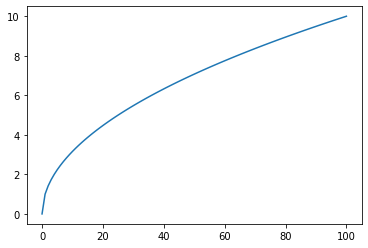

In [4]:
x = np.arange(0, 101, 1)
y = np.sqrt(x)
plt.plot(x,y)

Besides just calculating `y`, we can also change the values by hand.
Let's say we want to replace the `y` for `x = 10` with the value `10`:

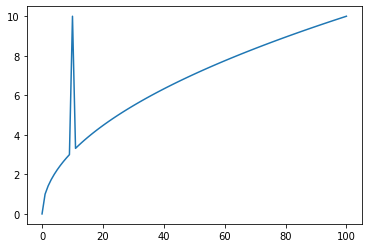

In [5]:
y[10] = 10
plt.plot(x,y)

# 2 Introducing For-loops
Often you have to perform repetitive tasks in programming. For example, you want to repeate a piece of code printing a number in a list.

In [6]:
numbers =  [1,2,3,4,5]

for item in numbers:
    # Execute this code in the for-loop
    print("the number is", item)
    
# We are done
print("We are done!")

the number is 1
the number is 2
the number is 3
the number is 4
the number is 5
We are done!


So what happened here? We first defined a variable named numbers with the values 1 through 5 in it. Then, the for-loop is started. Python will loop through all items in the list `numbers`, and execute the code in the indented part. That is, the lines after the semi-colon (`:`) that are indented by 4 spaces. Python will continue after it has looped through all values (1 to 5) and continue down the lines. No stop statement is needed, just stop indentating.

Often, we want to loop over a range of numbers, and use those number to select an item in a list. To generate a list of number to loop through  Python has the built-in method `range`, which will return a iterable of `n` integers. 


In [7]:
names = ["piet", "jan", "anna", "pim", "esther", "julia"] # Let's try some common Dutch names
for i in range(len(names)):
    print("the item", i, "is name", names[i])    

the item 0 is name piet
the item 1 is name jan
the item 2 is name anna
the item 3 is name pim
the item 4 is name esther
the item 5 is name julia


Looping over a range of numbers of course also works with 1D ranges from numpy. 
So we could calculate the sqare root of x also in this way:

In [8]:
x = np.arange(0, 11, 1) # remember, the [stop] number is not included!
for n in x:
    print(np.sqrt(n))

0.0
1.0
1.4142135623730951
1.7320508075688772
2.0
2.23606797749979
2.449489742783178
2.6457513110645907
2.8284271247461903
3.0
3.1622776601683795


### Calculate the sum with a for loop
The code that is executed each time in the for-loop can be as complicated and long as you want. We can also perform calculations in this code, for example to calculate the sum of the numbers in a list. The formula for the mean $\mu$ of $x$ is pretty simple:

$\mu(x) = \frac{\sum(x)}{N}$

where $N$ is the number of elements in x. Let's see how we can program this formula in Python using the for-loop we just learned.

In [9]:
x = np.arange(0, 10)

sum_x = 0

for i in x:
    sum_x = sum_x + i
    # print(sum_x)
    
print("The sum we calculated is:", sum_x)
print("The actual sum is", np.sum(x)) # numpy has a built-in function

print("The mean we calculated is", sum_x / len(x))
print("The actual mean is", np.mean(x)) # again, there's an inbuilt function for this

The sum we calculated is: 45
The actual sum is 45
The mean we calculated is 4.5
The actual mean is 4.5


### Exercise 1. Calculate the standard deviation with a for loop
In this exercise we are going calculate the sum and the mean of some numbers in a list using a simple formula. 

We will programm the following formula for the calculation of the standard deviation $\sigma$:

$\sigma = \sqrt\frac{\sum(x_i-\mu)^2}{N}$

where $x_i$ are the individual values in the series $x$, $\mu$ is the mean value of $x$, and &\$N$ is the number of values in $x$. perform the following steps:

- Create a array with random numbers (`np.random.rand`) and subtract 0.5 from each value;
- Use a for-loop to calculate the mean of x;
- Then, use a for-loop to implement the above formula;
- Check your answer by calling NumPy's `std` method.

In [ ]:
# Type your code here    

[Answer](#Exercise-1)

Of course you can also do loops within loops (and within loops…).
Just take be careful with two things:
 - Python uses indentation to tell apart different loops, so make sure you're always on the right level of indentations!
 - A loop inside a loop is going to be run completely once in every round of the outside loop, so even with comparable simple operations, you can quickly get slow running code!
 
To illustrate the first point, let's calculate the means of each colum of a random field "the hard way":

In [10]:
xy = np.random.randn(10,10) # lets construct a 10x10 field of random numbers first

for i in range(len(xy)):
    # first level of indentation!
    col = xy[:, i] # select the ith column
    col_sum = 0 # set up an empty variable for the sum
    for n in col:
        # second level of indentation!
        col_sum = col_sum + n
    # back to the first level again
    # if we are running this code, we went through all the entries in the column
    col_mean = col_sum / len(col)
    print("column", i, "has a mean of", col_mean)
    # as long as there is numbers in range(len(xy)) left,
    # this loop is going to start again with a new round, using the next column

column 0 has a mean of -0.16225237227596628
column 1 has a mean of 0.38841840236880815
column 2 has a mean of -0.4479126182189591
column 3 has a mean of 0.07540242068965979
column 4 has a mean of -0.5941714563674283
column 5 has a mean of 0.10705597779152935
column 6 has a mean of 0.1416650330837518
column 7 has a mean of 0.47802545940977376
column 8 has a mean of 0.22699647279905202
column 9 has a mean of -0.09211456866343018


Of course such a simple example will produce a result essentially immidiately, even if we would increase the size of xy by an order of magnitude or two, but at a certain point, this can spiral out of control quickly (or rather, make your PC respond slowly or even crash it).

Loops are a very powerfull tool in our toolbox and can be used for many things. For more information on the use of loops please have a look at [this website](https://www.tutorialspoint.com/python/python_loops.htm).

# 3 Conditional statements
It is a common operation to check if a value is equal to, larger or smaller than another value. For example, if a certain condition is True, you want to execute a piece of code. These type of statements are called "conditional" statements, as it depends on the the condition being `True` or `False` for some code to be executed or not. Let's start with a simple example:

In [11]:
a = "abc"

In [12]:
a == "abc"

True

In [13]:
a == "a"

False

In [14]:
a = "a"
b = "b"

if a == b:
    # Code to execute if statement is True
    print("a is equal to b")
else:
    # Code to execute if statement is False
    print("a is not equal to b")

a is not equal to b


The code above is a type example of checking a condition statement (a equals b) and executing different types of code depending on the outcome. When the statement `a == b` returns `True`, the code following the semi-colon (`:`) is executed (indeed, again indented by four spaces or a tab). If `False`, Python continues down the lines and, in this case, finds an `else:` statement. This means that if the above condition is `False`, the indented code after the else statement is executed.

Other comparison operators are:

- equals: `==`
- not equal: `!=`
- larger than: `>`
- smaller than: `>`
- greater than or equal to: `>=`
- smaller than or equal to: `<=`


In [20]:
x = 3
y = 10
z = 1

x == y

False

In [16]:
y >= x

True

In [21]:
if x == y:
    print("x is equal to y")
# We can check multiple conditions using an if/elif/else statement
elif x < z:
    print("x is smaller than z")
else:
    print("x is between y and z")

x is between y and z


### if/elif/else
In the above code block you can see how you can check multiple conditional statements using the if/elif/else format. You can put in as many elif-statements as you want, for example to compare a value to multiple values one-by one. 

### Combining statements
It is also possible to combine conditional statements, as is shown below. The statement are put in between round brackets (e.g., `(a == b)`) and are combined with the `&` sign. Other combinations are possible (e.g., `or`, `and`, `and not`) but are outside the scope of this lecture. [Here](https://www.tutorialspoint.com/python/python_basic_operators.htm) you can find an overview of the basic operators and what you can do with them.

In [22]:
if (x < y) & (x > z):
    print("x is between y and z")

x is between y and z


In [23]:
(x < y) & (x > y)

False

# Combining loops and statements

One of the main uses for loops and statements could be to loop through some data and to find certain features.

Lets say we have data from the eHYD Mur gauging station in Graz, close to the Keplerbrücke.
Below you find the dates where measurements have been taken and the water temperature of the Mur at these dates, from 2006 to 2016.

In [24]:
dates = ['01.01.2006', '01.02.2006', '01.03.2006', '01.04.2006', '01.05.2006', '01.06.2006', '01.07.2006', '01.08.2006', '01.09.2006', '01.10.2006', '01.11.2006', '01.12.2006', '01.01.2007', '01.02.2007', '01.03.2007', '01.04.2007', '01.05.2007', '01.06.2007', '01.07.2007', '01.08.2007', '01.09.2007', '01.10.2007', '01.11.2007', '01.12.2007', '01.01.2008', '01.02.2008', '01.03.2008', '01.04.2008', '01.05.2008', '01.06.2008', '01.07.2008', '01.08.2008', '01.09.2008', '01.10.2008', '01.11.2008', '01.12.2008', '01.01.2009', '01.02.2009', '01.03.2009', '01.04.2009', '01.05.2009', '01.06.2009', '01.07.2009', '01.08.2009', '01.09.2009', '01.10.2009', '01.11.2009', '01.12.2009', '01.01.2010', '01.02.2010', '01.03.2010', '01.04.2010', '01.05.2010', '01.06.2010', '01.07.2010', '01.08.2010', '01.09.2010', '01.10.2010', '01.11.2010', '01.12.2010', '01.01.2011', '01.02.2011', '01.03.2011', '01.04.2011', '01.05.2011', '01.06.2011', '01.07.2011', '01.08.2011', '01.09.2011', '01.10.2011', '01.11.2011', '01.12.2011', '01.01.2012', '01.02.2012', '01.03.2012', '01.04.2012', '01.05.2012', '01.06.2012', '01.07.2012', '01.08.2012', '01.09.2012', '01.10.2012', '01.11.2012', '01.12.2012', '01.01.2013', '01.02.2013', '01.03.2013', '01.04.2013', '01.05.2013', '01.06.2013', '01.07.2013', '01.08.2013', '01.09.2013', '01.10.2013', '01.11.2013', '01.12.2013', '01.01.2014', '01.02.2014', '01.03.2014', '01.04.2014', '01.05.2014', '01.06.2014', '01.07.2014', '01.08.2014', '01.09.2014', '01.10.2014', '01.11.2014', '01.12.2014', '01.01.2015', '01.02.2015', '01.03.2015', '01.04.2015', '01.05.2015', '01.06.2015', '01.07.2015', '01.08.2015', '01.09.2015', '01.10.2015', '01.11.2015', '01.12.2015', '01.01.2016', '01.02.2016', '01.03.2016', '01.04.2016', '01.05.2016', '01.06.2016', '01.07.2016', '01.08.2016', '01.09.2016', '01.10.2016', '01.11.2016', '01.12.2016']
data = [1.3,3.1,5.2,8.2,10.2,13,17.2,14.1,14.4,11.3,6.6,3.9,3.9,5.4,7.2,10.6,13.8,16.1,16.5,17,11.5,9.3,5.3,2.9,3.4,4.7,6.6,9.4,11.7,14.7,16.3,15.7,13.5,10.2,6.9,4.1,1.9,3.7,6.1,8.3,11.2,12.7,15,16.2,13,9.4,6.4,3.4,2.6,3.7,6.7,10.1,11.5,13.9,18,17,12.4,9.2,7,1.7,2.5,3.6,6.8,11.1,14,15,16.3,17.6,16,9.8,5.9,3.9,3.2,2.1,6.9,9,11.7,14.7,15.2,16.2,13.3,10.1,6.7,3,4.2,4.4,5.8,8.9,11.3,13.7,18.3,18.6,14.8,11.3,7.4,4.4,5.4,5.4,8,10.6,11.5,14.9,17.2,15.6,12.7,12,8.8,5.4,4.4,4.7,7.6,9.3,11.9,15.5,19.2,18,14.9,10.3,8.1,5.5,4.1,6.1,7.9,10.8,12.5,15.1,16.3,15.3,14.9,10.8,7.1,3.6,]

Let's write a loop that prints us all the dates where a temperature below 5 degrees was recorded.

We could simply loop through `data` and look for the temperatures, but we also want the date, which is a second array.
Since they're both the same length (though we better check to make sure!) we initialize a counter first.

In [25]:
if len(data) == len(dates):
    counter = range(len(data))
    for i in counter:
        temperature = data[i]
        if temperature < 5:
            date = dates[i]
            print('at', date, 'the Mur had a temperature of', temperature, 'degrees.')
else:
    print('something is wrong with the data')

at 01.01.2006 the Mur had a temperature of 1.3 degrees.
at 01.02.2006 the Mur had a temperature of 3.1 degrees.
at 01.12.2006 the Mur had a temperature of 3.9 degrees.
at 01.01.2007 the Mur had a temperature of 3.9 degrees.
at 01.12.2007 the Mur had a temperature of 2.9 degrees.
at 01.01.2008 the Mur had a temperature of 3.4 degrees.
at 01.02.2008 the Mur had a temperature of 4.7 degrees.
at 01.12.2008 the Mur had a temperature of 4.1 degrees.
at 01.01.2009 the Mur had a temperature of 1.9 degrees.
at 01.02.2009 the Mur had a temperature of 3.7 degrees.
at 01.12.2009 the Mur had a temperature of 3.4 degrees.
at 01.01.2010 the Mur had a temperature of 2.6 degrees.
at 01.02.2010 the Mur had a temperature of 3.7 degrees.
at 01.12.2010 the Mur had a temperature of 1.7 degrees.
at 01.01.2011 the Mur had a temperature of 2.5 degrees.
at 01.02.2011 the Mur had a temperature of 3.6 degrees.
at 01.12.2011 the Mur had a temperature of 3.9 degrees.
at 01.01.2012 the Mur had a temperature of 3.2 d

### Exercise 2. Find all dates in 2008 that hat a Mur temperature above 10 and below 15 degrees

Write a loop using the data and dates for the Mur gauge above that checks at which dates in the year 2008 the temperature of the river was above 10 degrees, but still below 15 degrees.

*Hint: The dates are stored as strings! Remember the last lectures how we selected ranges and how we changed data types into oneanother.*

In [ ]:
# Type your code here

[Answer](#Exercise-2)

### Exercise 3. Count the number of letters
In this exercise we are going to do some data mining on a piece of text. The goal is to count the number of letters "a", "k" and "y" in the piece of text shown below. It is your task to write a for loop that counts the number of time the letters a, k, and y are present in the text below. Print the answer to the screen for each of the three letters.

*Hint: you will have to use three conditional statements and a if/elif/elif format to check if a letter is one of the three letters we are interested in.*

In [ ]:
# multiline string, copied from https://en.wikipedia.org/wiki/Python_(programming_language)

text = """Python is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum
and first released in 1991, Python has a design philosophy that emphasizes code readability, notably using 
significant whitespace. It provides constructs that enable clear programming on both small and large scales.
[26] Van Rossum led the language community until stepping down as leader in July 2018.[27][28] Python features 
a dynamic type system and automatic memory management. It supports multiple programming paradigms, including 
object-oriented, imperative, functional and procedural. It also has a comprehensive standard library.[29]
Python interpreters are available for many operating systems. CPython, the reference implementation of Python, 
is open source software[30] and has a community-based development model, as do nearly all of Python's other 
implementations. Python and CPython are managed by the non-profit Python Software Foundation.""" 

In [ ]:
# Type your code here

[Answer](#Exercise-3)

## Answers to the Exercises
### Exercise 1

In [26]:
x = np.random.rand(10) - 0.5

err = 0
sum_x = 0

# Calculate the sum of x, that we need to calculate the mean
for i in x:
    sum_x += i
    
# Calculate the actual mean    
mean = sum_x / len(x)    

for i in x:
    err += (i - mean) ** 2

std = np.sqrt(err / (len(x)))
    
print("The calculated standard deviation is:", std)
print("The actual standard deviation is:", np.std(x))

The calculated standard deviation is: 0.33447005767293847
The actual standard deviation is: 0.3344700576729384


### Exercise 2

Of course we could also first check for the temperatures and then see if they're in the year we are looking for, but since we know that we only need to check the temperature in a certain year and thus a small subset of the data, it is better to search for the year first and only run our *complicated* operation if needed.
Again, in this simple example it doesn't matter, but with more complicated stuff, these things can add up quickly.

In [27]:
counter = range(len(data))
for i in counter:
    date = dates[i]
    year = date[6:11] # the year is positions 6 to 11 of the string
    year = int(year) # in order to be able to work with it, we need to turn it into a number
    if year == 2008:
        temp = data[i]
        if (temp > 10) & (temp < 15):
            print('at ', date, 'the temperature was', temp, 'degrees.')

at  01.05.2008 the temperature was 11.7 degrees.
at  01.06.2008 the temperature was 14.7 degrees.
at  01.09.2008 the temperature was 13.5 degrees.
at  01.10.2008 the temperature was 10.2 degrees.


*Of course this is a very simple way to deal with time data and to find certain values.
Again, basic python allows us to work with such data without issues, but we have to "invent" various features.
In a later lecture, we will learn how to make life easier, using a package that's made to work with such data, making the above a much simpler and quicker operation-*


### Exercise 3

In [28]:
# multiline string, copied from https://en.wikipedia.org/wiki/Python_(programming_language)

text = """Python is an interpreted, high-level, general-purpose programming language. Created by Guido van Rossum
and first released in 1991, Python has a design philosophy that emphasizes code readability, notably using 
significant whitespace. It provides constructs that enable clear programming on both small and large scales.
[26] Van Rossum led the language community until stepping down as leader in July 2018.[27][28] Python features 
a dynamic type system and automatic memory management. It supports multiple programming paradigms, including 
object-oriented, imperative, functional and procedural. It also has a comprehensive standard library.[29]
Python interpreters are available for many operating systems. CPython, the reference implementation of Python, 
is open source software[30] and has a community-based development model, as do nearly all of Python's other 
implementations. Python and CPython are managed by the non-profit Python Software Foundation.""" 

In [29]:
sum_a = 0
sum_k = 0
sum_y = 0

for l in text:
    if l == "a":
        sum_a += 1
    elif l == "k":
        sum_k += 1
    elif l == "y":
        sum_y += 1
        
print("The letter a is in the string for", sum_a, "times.")
print("The letter k is in the string for", sum_k, "times.") 
print("The letter y is in the string for", sum_y, "times.") 

The letter a is in the string for 74 times.
The letter k is in the string for 0 times.
The letter y is in the string for 26 times.
